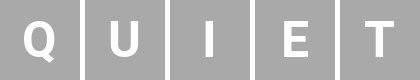

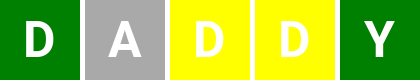

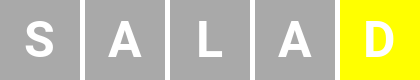

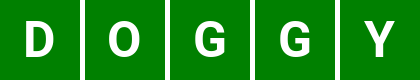

yes! The word is doggy!


In [44]:
from PIL import Image, ImageFont, ImageDraw

import random
from typing import List, Union



# GuessLetter class
class GuessLetter:
    def __init__(self, correct_position: List[bool], in_word: List[bool]) -> None:
        self.correct_position = correct_position
        self.in_word = in_word
        
    def is_correct_position(self, index: int) -> bool:
        return self.correct_position[index]
    
    def is_in_word(self, index: int) -> bool:
        return self.in_word[index]
    
    def is_correct_guess(self) -> bool:
        return all(self.correct_position)
    
    def __repr__(self) -> str:
        return f"GuessLetter({self.correct_position}, {self.in_word})"
    
    # def __str__(self) -> str:
    #     return f"Correct position: {self.correct_position}, In word: {self.in_word}"
   
 
 
 # Guess class  
class Guess:
    def __init__(self, word: str) -> None:
        self.word = word.upper()
        self.guesses: List[GuessLetter] = []
        
    def get_word(self) -> str:
        return self.word
    
    def get_guesses(self) -> List[GuessLetter]:
        return self.guesses
    
    def add_guess(self, guess: GuessLetter) -> None:
        self.guesses.append(guess)
    
    
    



# GameMaster class
class GameMaster:
    def __init__(self, target_word: str) -> None:
        self.target_word = target_word.upper()
        
    def make_guess(self, guess: Guess) -> GuessLetter:
        target_word = self.target_word
        guess = guess.get_word()
        
        # check if letter matches
        right_place = [guess[i] == target_word[i] for i in range(len(guess))]
        in_word = [guess[i] in target_word for i in range(len(guess))]
        
        return GuessLetter(right_place, in_word)
    
    def make_visual_guess(self, guess:Guess) -> Image:
        def render_word(guess: str, correct_word: str):
            letters=[]
            for loc, letter in enumerate(guess):
                if correct_word[loc]==letter:
                    letters.append(render_letter(letter, in_word=True, correct_place=True))
                elif letter in correct_word:
                    letters.append(render_letter(letter, in_word=True))
                else:
                    letters.append(render_letter(letter))


            space_between_letters=5
            word_width=(len(letters)*letters[0].width)+(len(letters)-1)*space_between_letters
            word_height=letters[0].height

            wrd=Image.new('RGBA', (word_width,word_height), color="white")
            curr_loc=0
            for char in letters:
                wrd.paste(char,(curr_loc,0))
                curr_loc+=char.width+space_between_letters
            return wrd


        def render_letter(letter:str, in_word:bool=False, correct_place:bool=False)->Image:
            block_width=80
            block_height=80
            x=block_width//2
            y=block_height//2

            color:str="darkgrey"
            if correct_place:
                color="green"
            elif in_word:
                color="yellow"

            blk=Image.new('RGBA', (block_width,block_height), color=color)

            draw = ImageDraw.Draw(blk)

            # use a bitmap font
            font_size=50
            font = ImageFont.truetype("assets/roboto_font/Roboto-Bold.ttf", font_size)

            # see https://pillow.readthedocs.io/en/stable/handbook/text-anchors.html#text-anchors
            draw.text((x, y), letter, size=50, anchor="mm",  font=font)
            return blk
        
        return render_word(guess.get_word(), self.target_word)

# Bot class   
class Bot:
    def play(self, num_max_guesses: int, word_list: List[str], game_master: GameMaster) -> None:
        max_guesses = num_max_guesses
        guess_count = 0
        guesses: List[str] = []
        
        while guess_count < max_guesses:
            guess=word_list.pop(random.randrange(len(word_list)))
            guesses.append(guess)
            guess_count += 1
            guess_letter_list = game_master.make_guess(Guess(guess))
            display(game_master.make_visual_guess(Guess(guess)))
            #print(self._format_guess_feedback(guess, guess_letter_list))
            if guess_letter_list.is_correct_guess():
                print(f"yes! The word is {guess}!")
                return
        print(f"you ran out of guesses. The word was {game_master.target_word}.")


    def _create_guess(self, word_list: List[str]) -> str:
        return random.choice(word_list)

    def _format_guess_feedback(self, guess: str, guess_letter_list) -> str:
        feedback_str = f"{guess}: "
        for i in range(len(guess)):
            if guess_letter_list.is_correct_position(i):
                feedback_str += guess[i] + " "
            elif guess_letter_list.is_in_word(i):
                feedback_str += guess[i].lower() + " "
            else:
                feedback_str += "_ "
        return feedback_str

    

mybot=Bot()
mybot.play(5, ["doggy", "mommy", "daddy", "spank", "quiet", "lived", "salad"], GameMaster("doggy"))


In [13]:
# This is where pixels can be taught
render_word("DOGGY").load()[0,0]

(169, 169, 169, 255)